In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [5]:
# Step 2: Load the dataset
df = pd.read_csv("water quality prediction.csv")
print("Initial shape:", df.shape)
df.head()


Initial shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
# Step 3: Handle missing values using pandas
# Fill missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Confirm no missing values
print("Missing values after filling:\n", df.isnull().sum())


Missing values after filling:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [7]:
# Step 4: Separate features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]


In [8]:
# Step 5: Split into training and testing (70/30 split instead of 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)


In [9]:
# Step 6: Use GridSearchCV to tune Decision Tree hyperparameters
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=1), params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)


Best parameters found: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5}


Accuracy: 0.6541200406917599

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.90      0.76       600
           1       0.63      0.27      0.38       383

    accuracy                           0.65       983
   macro avg       0.64      0.58      0.57       983
weighted avg       0.65      0.65      0.61       983



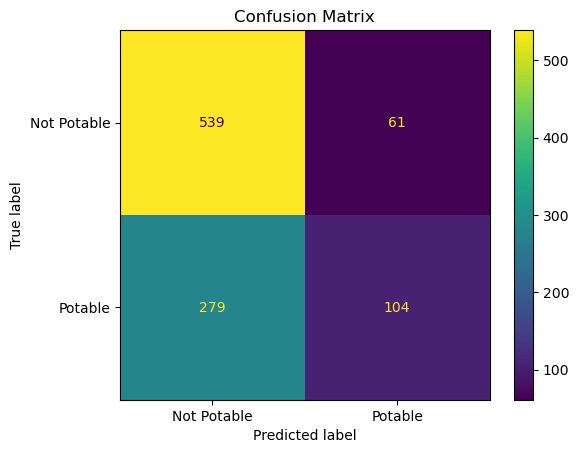

In [10]:
# Step 7: Evaluate the best model
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(best_tree, X_test, y_test, display_labels=['Not Potable', 'Potable'])
plt.title("Confusion Matrix")
plt.show()
